#### Stacking algorithm - regression example

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

import tensorflow as tf
import keras
from keras import layers

In [7]:
df = pd.read_csv("processed_regression_housing.csv")
df.head()

,housing_median_age,total_rooms,population,median_income,median_house_value,distance_to_nearest_city,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
0,52.0,1627.0,565.0,3.8462,342200.0,17.06,0,0,0,1
1,52.0,919.0,413.0,4.0368,269700.0,17.06,0,0,0,1
2,52.0,2535.0,1094.0,3.6591,299200.0,16.55,0,0,0,1
3,52.0,3104.0,1157.0,3.1200,241400.0,16.55,0,0,0,1
4,42.0,2555.0,1206.0,2.0804,226700.0,15.76,0,0,0,1


In [8]:
# CatBoost requires we save our continuous and categorical variables separately into lists
categorical_variables = [ 
    "ocean_proximity_<1H OCEAN",
    "ocean_proximity_INLAND",
    "ocean_proximity_ISLAND",
    "ocean_proximity_NEAR BAY"]

# continuous variables also into a list
continuous_variables = [ 
    "housing_median_age",
    "total_rooms",
    "population",
    "median_income",
    "distance_to_nearest_city",
    "median_house_value"]

# the usual X/y -split
X = df.drop("median_house_value", axis=1)
y = df['median_house_value']

# usual train/test -split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# NOTE! SCALING => some of the algorithms require this
scaler = StandardScaler()

# create separate versions for the scaled data
# because we need both unscaled and scaled versions later
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####  Stacking algorithms - regression example

In [9]:
from sklearn.ensemble import StackingRegressor

# meta model is the "judge" or the optimizer of the stacking algorithm
# => it assigns weights to the models based on their performance
meta_model = LinearRegression()

# stacking regression algorithm
stacking_model = StackingRegressor(
    estimators=[('xgb', xgb.XGBRegressor(enable_categorical=True, objective="reg:squarederror")),
                ('randomforest', RandomForestRegressor()),
                ('lgbm', lgb.LGBMRegressor(objective="regression"))],
    final_estimator=meta_model,
    cv=5
)

# other than that, the stacking algorithm works as any other algorithm
stacking_model.fit(X_train, y_train)

# test predictions and metrics
predictions = stacking_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 14157, number of used features: 8
[LightGBM] [Info] Start training from score 182335.487533
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1078
[LightGBM] [Info] Number of data points in the train set: 11325, number of used features: 8
[LightGBM] [Info] Start training from score 182741.421457
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

# Results using processed housing data without dropping rows of median_house_value that is more than 500 001.
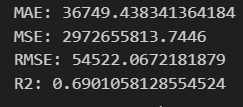

# Results with dropping extream rows:
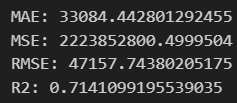

In [10]:
#
# original MAE with CatBoost:
# original RMSE with CatBoost:
# original R2 with CatBoost: 